In [1]:
import keras
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 电影评论数据
data = keras.datasets.imdb

In [3]:
max_word = 10000

In [4]:
# 注意格式, 最大的单词索引是1W
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=max_word)

In [6]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [7]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [9]:
# 获得单词的索引
word_index = data.get_word_index()

In [10]:
index_word = dict((value, key) for key,value in word_index.items())

In [11]:
[index_word.get(index-3, '?') for index in x_train[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [12]:
[len(seq) for seq in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [13]:
max([max(seq) for seq in x_train])

9999

文本的向量化

one-hot

k-hot

In [14]:
import numpy as np

In [15]:
# 返回文本向量key-hot dim是索引
def k_hot(seqs, dim=10000):
    result = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        result[i, seq] = 1
    return result

In [16]:
x_train = k_hot(x_train)

In [17]:
x_train.shape

(25000, 10000)

In [18]:
x_train[0].shape

(10000,)

In [19]:
x_test = k_hot(x_test)

In [20]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [21]:
# 初始化
model = keras.Sequential()

In [25]:
# 添加层
model.add(layers.Dense(32, input_dim=10000, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1

In [27]:
# 编译
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']
)

In [28]:
# 每一次训练的batch_size  validation_data在每一个batch结束后每一个的正确率
history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/15
98/98 [==============================] - 3s 32ms/step - loss: 0.4255 - acc: 0.8192 - val_loss: 0.2945 - val_acc: 0.8806
Epoch 2/15
98/98 [==============================] - 2s 22ms/step - loss: 0.2112 - acc: 0.9262 - val_loss: 0.3329 - val_acc: 0.8655
Epoch 3/15
98/98 [==============================] - 2s 23ms/step - loss: 0.1394 - acc: 0.9541 - val_loss: 0.3980 - val_acc: 0.8686
Epoch 4/15
98/98 [==============================] - 3s 28ms/step - loss: 0.0948 - acc: 0.9709 - val_loss: 0.4804 - val_acc: 0.8617
Epoch 5/15
98/98 [==============================] - 3s 27ms/step - loss: 0.0574 - acc: 0.9830 - val_loss: 0.5755 - val_acc: 0.8564
Epoch 6/15
98/98 [==============================] - 3s 28ms/step - loss: 0.0457 - acc: 0.9851 - val_loss: 0.6342 - val_acc: 0.8574
Epoch 7/15
98/98 [==============================] - 3s 26ms/step - loss: 0.0285 - acc: 0.9916 - val_loss: 0.7902 - val_acc: 0.8484
Epoch 8/15
98/98 [==============================] - 2s 25ms/step - loss: 0.0192 - a

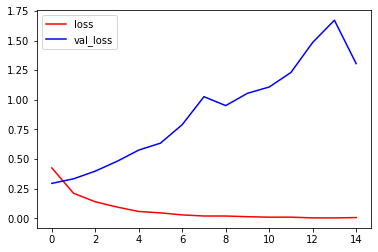

In [29]:
plt.plot(history.epoch, history.history.get('loss'), c='r', label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), c='b', label='val_loss')
plt.legend()

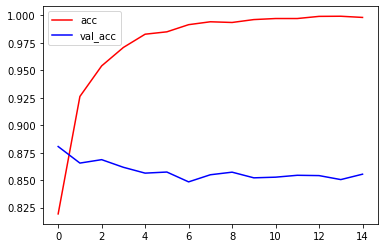

In [30]:
# 训练过程训练的数据为1 而测试降低，过拟合
plt.plot(history.epoch, history.history.get('acc'), c='r', label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), c='b', label='val_acc')
plt.legend()

In [ ]:
keras.datasets.